##<font color="mahroon">Aerofit </font>

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

##<font color="mahroon">Business Problem </font>

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

##<font color="mahroon">About </font>

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [ ]:
#Overview of the data available
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape

(180, 9)

In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
#Descriptive statistics
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


####<font color="orange">Observation </font>
Hence, We can see that difference between mean and median in Miles is high. This shows Outliers in Miles. There are some outliers in Age also.

In [ ]:
df.info

<bound method DataFrame.info of     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male         12        Single      3        3   32973   
4     KP281   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   KP781   40    Male         21        Single      6        5   83416   
176   KP781   42    Male         18        Single      5        4   89641   
177   KP781   45    Male         16        Single      5        5   90886   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2   

##<font color="Red">Univariate Analysis </font>

In [ ]:
#Total percentage of Male customers and Female customers
df["Gender"].value_counts(normalize="index")

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

####<font color="orange">Observation </font>
More Males are buying Treadmill as compared to Females.

In [ ]:
df["Miles"].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [ ]:
#Total percentage of Partnered and Single people
df["MaritalStatus"].value_counts(normalize="index")

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

####<font color="orange">Observation </font>
Partnered are buying Treadmills more as compared to Single people.

In [ ]:
#Total percentage of Fitness Level of people
df["Fitness"].value_counts(normalize="index")

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

####<font color="orange">Observation </font>
Most of the users have Fitness rank 3 and least of the customers have rank 1.After rank 3 most people have rank 5, followed by rank 2 and rank 4.

In [ ]:
#Checking for NaN values
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

####<font color="orange">Observation </font>
Hence No NaN values found.

In [ ]:
#Checking for missing values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

####<font color="orange">Observation </font>
Hence No missing values found.

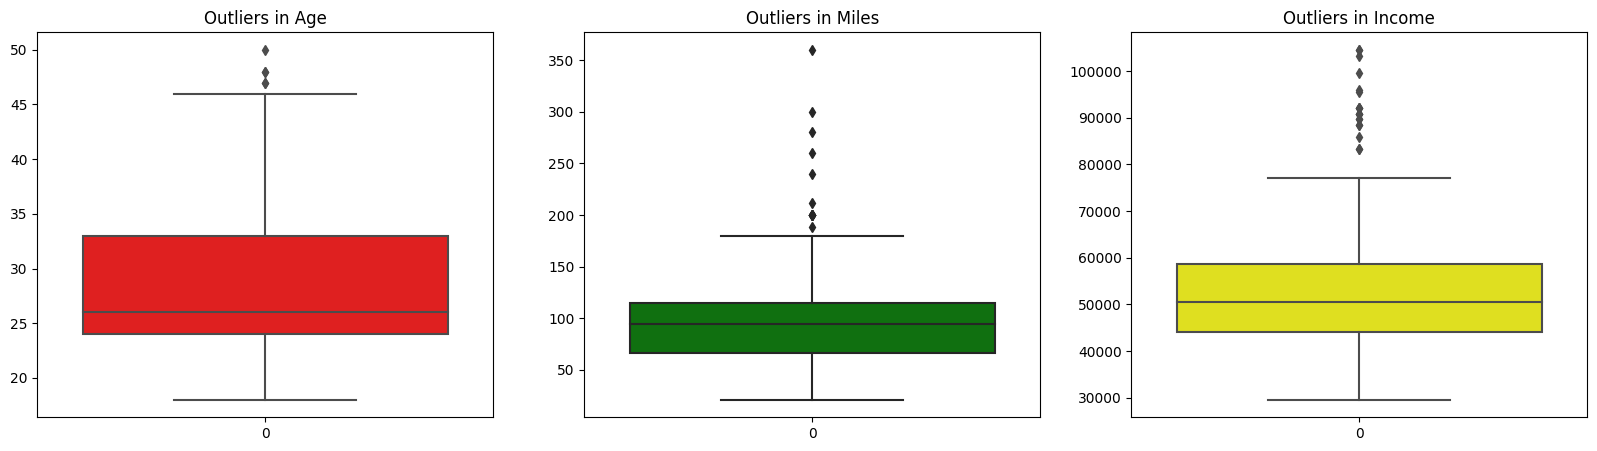

In [ ]:
#Checking Outliers
fig,ax=plt.subplots(1,3,figsize=(20,5))
axes= ax.ravel()
sns.boxplot(df["Age"],ax= axes[0],color="red")
axes[0].set_title("Outliers in Age")

sns.boxplot(df["Miles"],ax=axes[1],color="green")
axes[1].set_title("Outliers in Miles")

sns.boxplot(df["Income"],ax=axes[2],color="yellow")
axes[2].set_title("Outliers in Income")
plt.show()

####<font color="orange">Observation </font>
We can clearly see that there are more outliers in Miles as compared to Income and Age. Income has more outliers than Age.

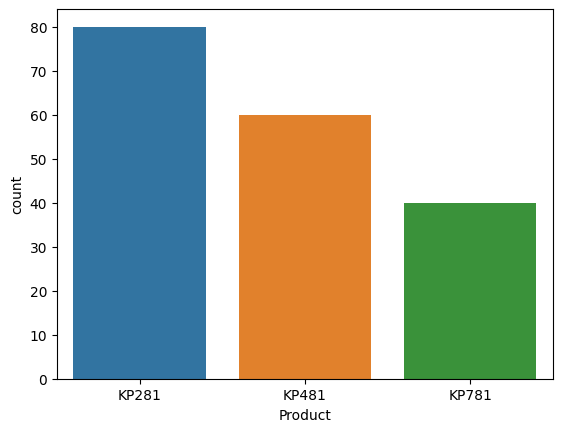

In [ ]:
#Numbers of different treadmills bought by customers
sns.countplot(df,x="Product")
plt.show()

####<font color="orange">Observation </font>
1. Most sold Treadmill is KP281.
2. Least sold Treadmill is KP781.

##<font color="red">Bivariate Analysis </font>

In [ ]:
#Average age of customers buying different Treadmills
df.groupby("Product")["Age"].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [ ]:
#Average Usage of customers buying different Treadmills
df.groupby("Product")["Usage"].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [ ]:
#Average Income of customers buying different Treadmills
df.groupby("Product")["Income"].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [ ]:
#Average Miles covered by customers buying different Treadmills
df.groupby("Product")["Miles"].mean()

Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64

In [ ]:
#Average Age of people on different fitness rank
df.groupby("Fitness")["Age"].mean()

Fitness
1    27.000000
2    28.269231
3    28.752577
4    28.333333
5    29.806452
Name: Age, dtype: float64

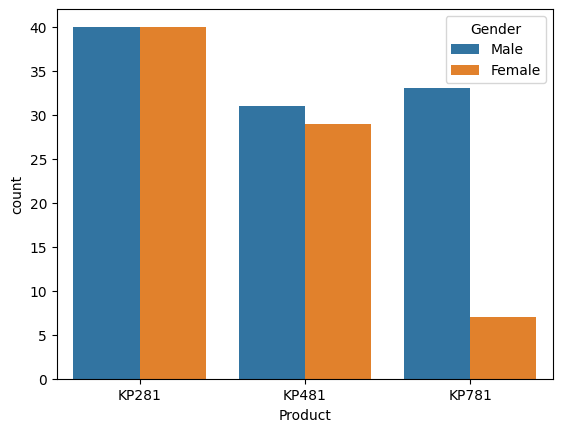

In [ ]:
#Checking Number of customers of different Treadmills genderwise
sns.countplot(df,x="Product",hue="Gender")
plt.show()

####<font color="orange">Observation</font>
There is a high difference in the number of Male users and Female users of KP781. There id slight difference in Males and Females users of KP481.
Amost same number of Males and Females are using KP281, as it is also most purchased


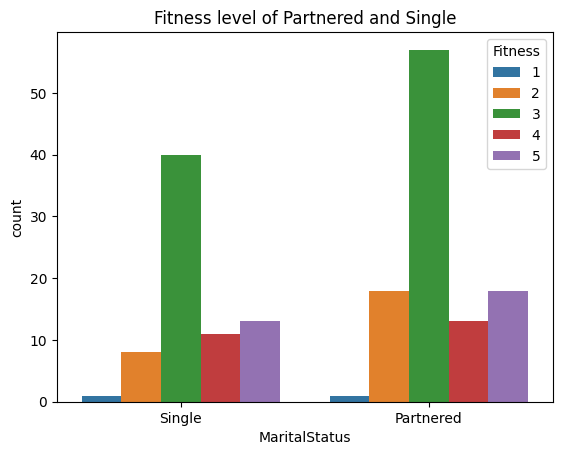

In [ ]:
#Checking Relation between Fitness and MaritalStatus
sns.countplot(df,x="MaritalStatus",hue="Fitness")
plt.title(label='Fitness level of Partnered and Single')
plt.show()

####<font color="orange">Observation</font>
We can conclude that more Married People are buying Treadmills than Single ones. Whether Single or Married number of users on Rank 3 is higher in both cases.Highest Rank is 5 in which Married people are higher than Singles. Lowest Rank is 1 in which both are almost same.More married are on rank 2 than singles.

Text(0.5, 1.0, 'Total Miles walked by Partnered and Singles')

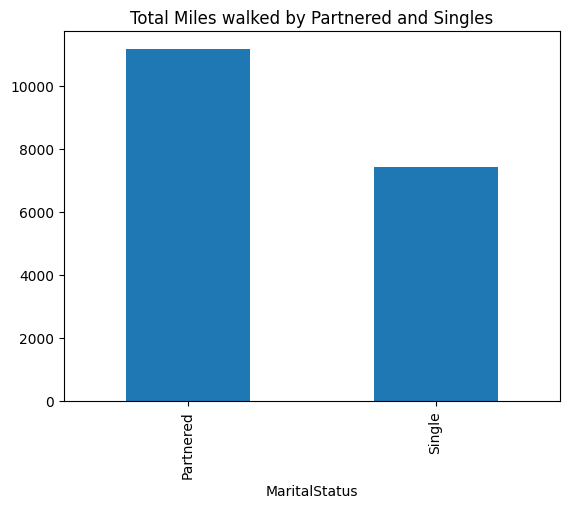

In [ ]:
#Checking Relation between Miles and MaritalStatus
df.groupby("MaritalStatus")["Miles"].sum().plot(kind='bar')
plt.title(label='Total Miles walked by Partnered and Singles')

####<font color="orange">Observation</font>
Married people has walked more Miles than Single people.

Text(0.5, 1.0, 'Average age of customers buying different models of Treadmill')

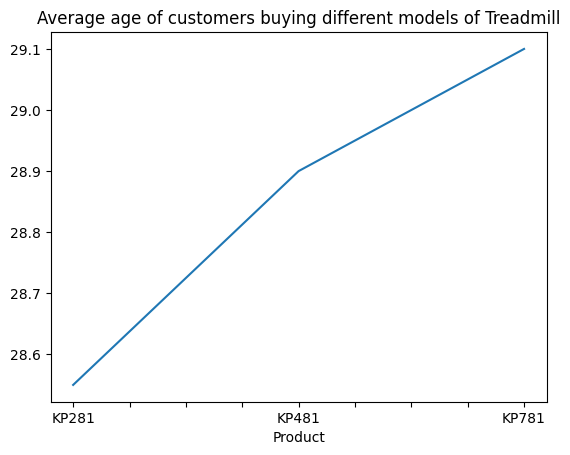

In [ ]:
#Checking Relation between Miles and MaritalStatus
df.groupby("Product")["Age"].mean().plot(kind='line')
plt.title(label='Average age of customers buying different models of Treadmill')

####<font color="orange">Observation</font>
Average age of cutomers buying KP281 is around 28.5.
Average age of cutomers buying KP481 is around 28.9.
Average age of cutomers buying KP781 is around 29.1.


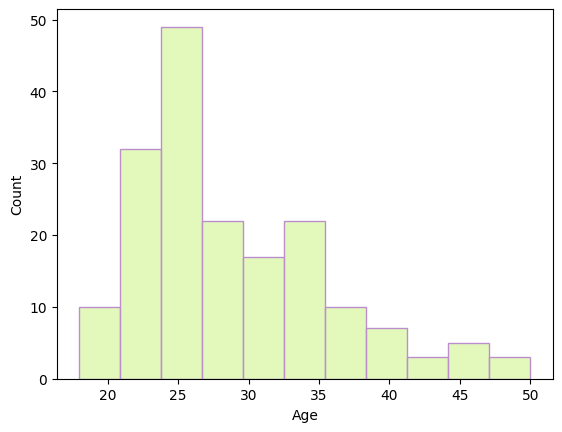

In [ ]:
#Checking the relation of age with the purchase
sns.histplot(df["Age"], stat='count',color='#DAF7A6', edgecolor='#BB8FCE')
plt.show()

####<font color="orange">Observation</font>
We can see Clearly that mostly the people around 25 years of Age purchase the treadmill. Hence, we can say people between 20 to 25 are buying treadmills more as compared to other age groups.

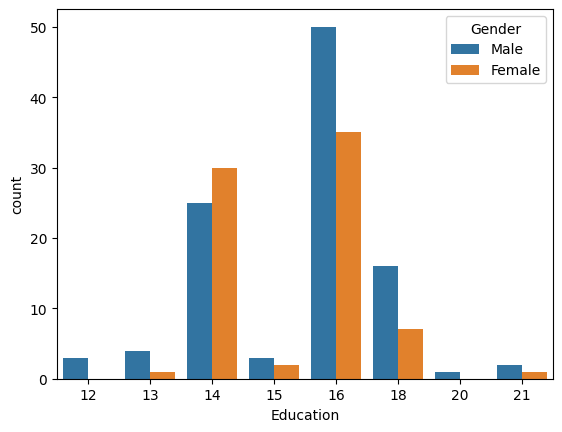

In [ ]:
#Checking the Relation of Education with the purchases Genderwise
sns.countplot(data= df, x= "Education",hue="Gender")
plt.show()

####<font color="orange">Observation</font>
Hence, people with 16 years of Education have bought most number of Treadmills so far. People with very high or low education tend to buy less treadmills. After 16, People with 14 years of experience have bought high number of Treadmills.

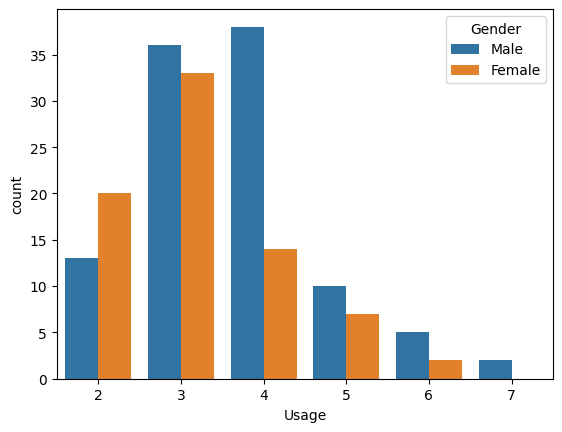

In [ ]:
#Checking Usage of consumers genderwise
sns.countplot(data=df, x='Usage', hue='Gender')
plt.show()

####<font color="orange">Observation</font>
We can conclude that mostly Males tend to use the treadmill 4 times a week while mostly Females tend use treadmill 3 times a week. No Male is using the treadmill 7 days a week.

##<font color="red">Multivariate Analysis </font>

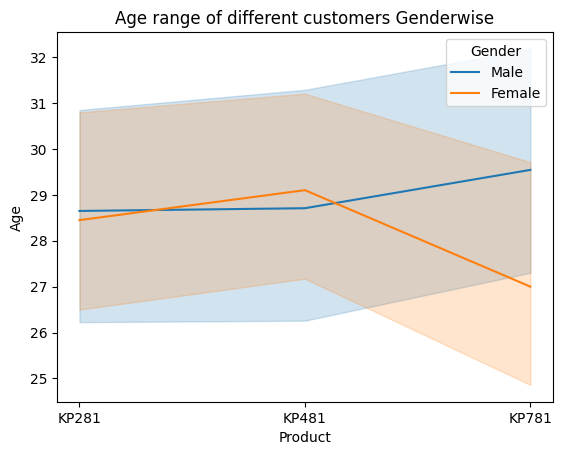

In [ ]:
#Age range of different customers Genderwise
sns.lineplot(df,x="Product",y="Age",hue="Gender")
plt.title(label='Age range of different customers Genderwise')
plt.show()

####<font color="orange">Observation</font>
1. The Age Range for the Female customers of KP281 is between 26 to 31 and for Male customers is between 26 to 31.
2. The Age Range for the Females customers of KP481 is between 26 to 32 and for Male customers is between 27 to 31.
3. The Age Range for the Females customers of KP781 is between 24 to 30 and for Male customers is between 27 to 33.

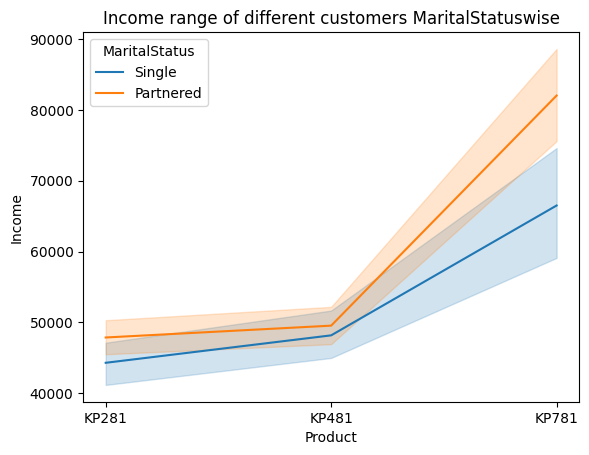

In [ ]:
sns.lineplot(df,x="Product",y="Income",hue="MaritalStatus")
plt.title(label='Income range of different customers MaritalStatuswise')
plt.show()

####<font color="orange">Observation</font>
1. We can see that Income range of customers of KP281 for Single people is 40,000 to 46,000 and for Partnered people is 45,000 to 50,000.   
2. Income range of customers of KP481 for Single people is 45,000 to 52,000 and for Partnered people is 46,000 to 52,000.   
3. Income range of customers of KP781 for Single people is 58,000 to 75,000 and for Partnered people is around 75,000 to 88,000.     
4. Hence, more salaried people are going for advance level treadmill,KP781 and less salaried people go for basic treadmill,KP281.

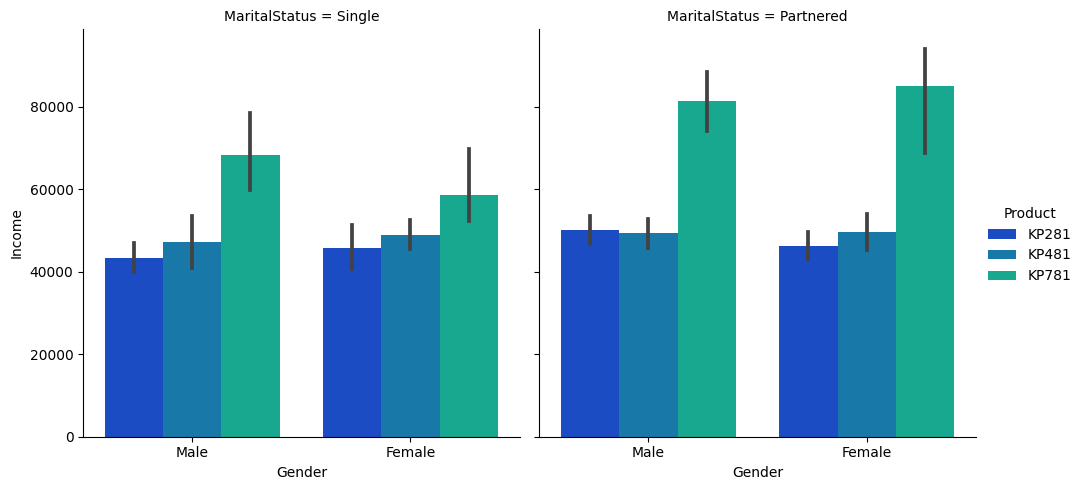

In [ ]:
#Checking relation between Income, Gender and Marital Status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=df, kind='bar', palette='winter')
plt.show()

####<font color="orange">Observation</font>
1. High Salaried people go for Advance level treadmill,KP781.
2. Average level income people go for Intermediate level or Basic level treadmill,KP481 and KP281.
3. Married People tend to go for KP781 more as compared to Single people.  

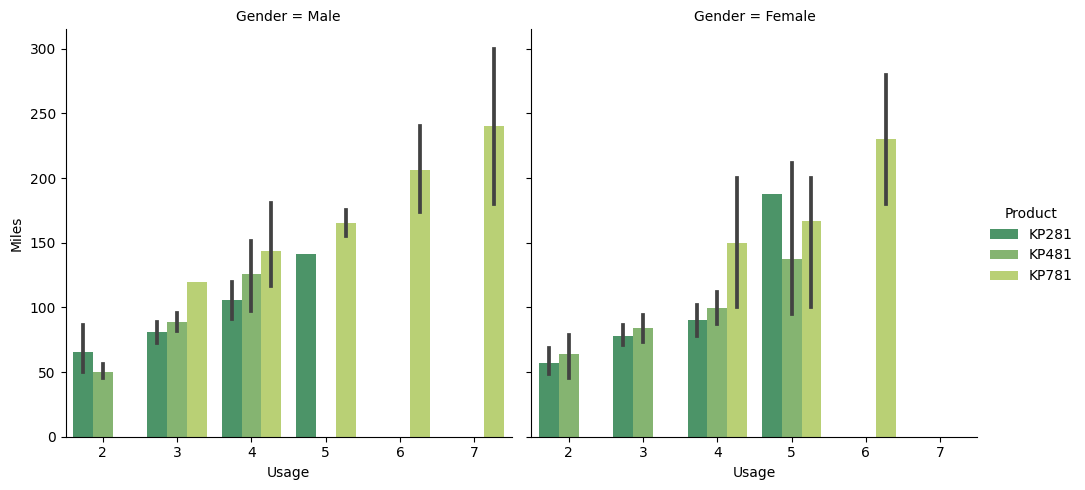

In [ ]:
#Checking relation between Miles walked, Gender and Usage, Productwise
sns.catplot(x='Usage',y='Miles', hue='Product', col='Gender', data=df, kind='bar', palette='summer')
plt.show()

####<font color="orange">Observation</font>
1. Males and Females who have used Treadmill 7 days a week have covered the highest miles.
2. Highest miles are being covered using KP781.Hence, People owning KP781 are using it more and are more health concious.
3. Highest Fitness Level of KP281 users(Males and Females) is 5.
4. Highest Fitness Level of KP481 male users is 4 and female users is 5.
5. Least walked by KP781 male users is 3 days a week and female users is 4 days a week.
6. Hence, People buying KP781 are more fitness concious as compared to other treadmill buyers.

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


##<font color="red">Conditional and Marginal Probability </font>

In [ ]:
#Conditional and Marginal probabilities of Males and Females that have purchased Different types of Treadmill.
pd.crosstab(df["Product"],df["Gender"],normalize="index",margins=True)

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


####<font color="orange">Observation</font>
1. Marginal Probability of Females buying a Treadmill is 42.22%
2. Marginal Probability of Males buying a Treadmill is 57.77%.
3. This shows Conditional Probabilities,that most Females have purchased Treadmill i.e 50% given that It is KP281(entry level treadmill)
4. Most males have purchased Treadmill i.e 82.5% given that It is KP781(advance level treadmill).



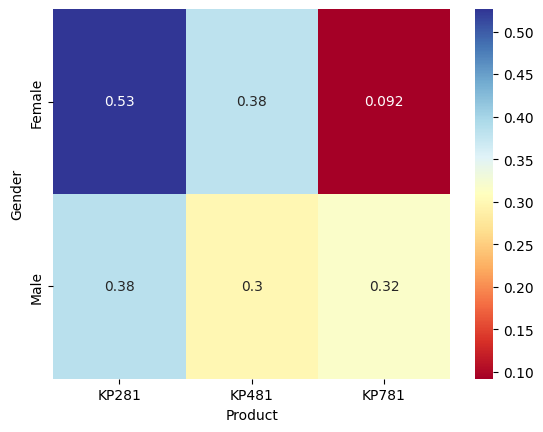

In [ ]:
#Conditional Probability of Product,Gender being given
sns.heatmap(pd.crosstab(df["Gender"],df["Product"],normalize="index"),annot=True,cmap='RdYlBu')
plt.show()

####<font color="orange">Conditiona Probability (Product|Gender)</font>
1.  Probability of purchasing KP281 given that the customer is a Female=53%
2.  Probability of purchasing KP481 given that the customer is a Female=38%
3.  Probability of purchasing KP781 given that the customer is a Female=9.2%
4.  Probability of purchasing KP281 given that the customer is a Male=38%
5.  Probability of purchasing KP481 given that the customer is a Male=30%
6.  Probability of purchasing KP781 given that the customer is a Male=32%

In [ ]:
#Conditional and Marginal probabilities of People with different years of Education purchasing different types of Treadmill.
pd.crosstab(df["Product"],df["Education"],normalize="index",margins=True)

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.025000,0.037500,0.375000,0.050000,0.487500,0.025000,0.000000,0.000000
KP481,0.016667,0.033333,0.383333,0.016667,0.516667,0.033333,0.000000,0.000000
KP781,0.000000,0.000000,0.050000,0.000000,0.375000,0.475000,0.025000,0.075000
All,0.016667,0.027778,0.305556,0.027778,0.472222,0.127778,0.005556,0.016667


####<font color="orange">Observation</font>
1. Marginal probability Of people with 12 years of Education buying a treadmill=1.66%
2. Marginal probability Of people with 13 years of Education buying a treadmill=2.77%.
3. Marginal probability Of people with 14 years of Education buying a treadmill=30.5%.
4. Marginal probability Of people with 15 years of Education buying a treadmill=2.77%.
5. Marginal probability Of people with 16 years of Education buying a treadmill=47.22%.
6. Marginal probability Of people with 18 years of Education buying a treadmill=12.77%.
7. Marginal probability Of people with 20 years of Education buying a treadmill=0.5%
8. Marginal probability Of people with 21 years of Education buying a treadmill=1.66%
9. People with Minimum education(12 years) go for KP281(entry level treadmill)
10.  People with high education(20 or 21 years) go for KP781(advance level treadmill).

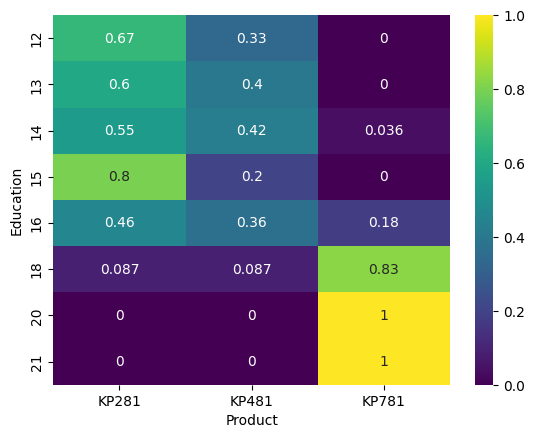

In [ ]:
#Conditional Probability of Product,Education being given
sns.heatmap(pd.crosstab(df["Education"],df["Product"],normalize="index"),annot=True,cmap='viridis')
plt.show()

####<font color="orange">Conditional Probability(Product|Education)</font>
1. Probability of purchasing KP281 given that the customer has Education of 12 Years=67%
2. Probability of purchasing KP481 given that the customer has Education of 12 Years=33%
3. Probability of purchasing KP781 given that the customer has Education of 12 Years=0%
4. Probability of purchasing KP781 given that the customer has Education of 20 0r 21 Years=100%
5. Probability of purchasing KP281 given that the customer has Education of 16 Years=46%
6. Probability of purchasing KP481 given that the customer has Education of 16 Years=36%
7. Probability of purchasing KP781 given that the customer has Education of 16 Years=18%

In [ ]:
#Conditional and Marginal probabilities of Purchases made based on MaritalStatus.
pd.crosstab(df["Product"],df["MaritalStatus"],normalize="index",margins=True)

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


####<font color="orange">Observation</font>
1. Marginal Probability of Partnered People buying any of the Treadmill=59.44%
2. Marginal Probability of Single People Buying any of the Treadmill=40.55%
3. Whether Partenered or Single mostly people purchase entry level treadmill,KP281.

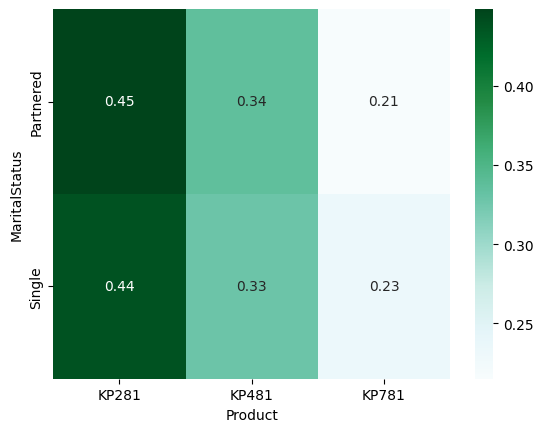

In [ ]:
#Conditional Probability of Product,MaritalStatus being given
sns.heatmap(pd.crosstab(df["MaritalStatus"],df["Product"],normalize="index"),annot=True,cmap='BuGn')
plt.show()

####<font color="orange">Conditional Probability (Product|MaritalStatus)</font>
1. Probability of buying KP281 given that the customer is Partnered=45%
2. Probability of buying KP481 given that the customer is Partnered=34%
3. Probability of buying KP781 given that the customer is Partnered=21%
4. Probability of buying KP281 given that the customer is Single=44%
5. Probability of buying KP481 given that the customer is Single=33%
6. Probability of buying KP781 given that the customer is Single=23%

In [ ]:
#Conditional and Marginal probabilities of usage by people of different types of treadmill.
pd.crosstab(df["Product"],df["Usage"],normalize="index",margins=True)

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.237500,0.462500,0.275000,0.025000,0.000000,0.000000
KP481,0.233333,0.516667,0.200000,0.050000,0.000000,0.000000
KP781,0.000000,0.025000,0.450000,0.300000,0.175000,0.050000
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111


####<font color="orange">Observation</font>
1. Marginal Probability of a Person,using treadmill 2 times a week,buying a treadmill is 18.33%.
2. Marginal Probability of a Person,using treadmill 3 times a week,buying a treadmill is 38.33%.
3. Marginal Probability of a Person,using treadmill 4 times a week,buying a treadmill is 28.88%.
4. Marginal Probability of a Person,using treadmill 5 times a week,buying a treadmill is 9.44%.
5. Marginal Probability of a Person,using treadmill 6 times a week,buying a treadmill is 3.88%.
6. Marginal Probability of a Person,using treadmill 7 times a week,buying a treadmill is 1.11%.
7. People who use Treadmill twice a week go for KP281 and People who use Treadmill 7 days a week go for KP781. Hence, we can say that the more a person has a high Fitness Rank more likely he is to buy an advanced level treadmill,KP781.

In [ ]:
#Conditional and Marginal probabilities of usage by people of different types of treadmill.
pd.crosstab(df["Product"],df["Fitness"],normalize="index",margins=True)

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.012500,0.175000,0.675000,0.112500,0.025000
KP481,0.016667,0.200000,0.650000,0.133333,0.000000
KP781,0.000000,0.000000,0.100000,0.175000,0.725000
All,0.011111,0.144444,0.538889,0.133333,0.172222


####<font color="orange">Observation</font>
People with Fitness rank 1 do not usually buy advanced level treadmills,KP781 they rather prefer buying entry-level treadmills,KP281, or intermediate level treadmills, KP481. People with high Fitness Rank such as 4 or 5 more likely to buy KP781.

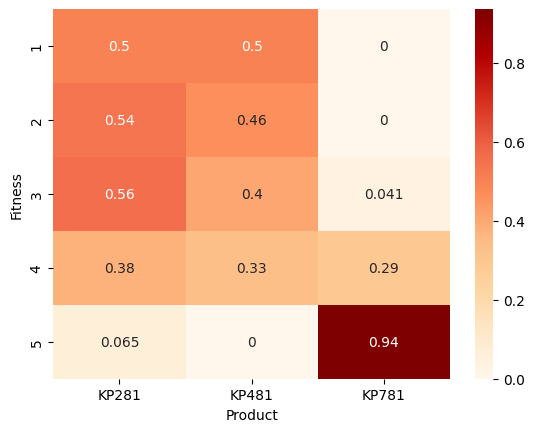

In [ ]:
#Conditional Probability of Product,Fitness being given
sns.heatmap(pd.crosstab(df["Fitness"],df["Product"],normalize="index"),annot=True,cmap='OrRd')
plt.show()

####<font color="orange">Conditional Probability (Product|Fitness)</font>
1. Probability of Buying KP281 given that the customer's Fitness Rank is 1=50%
2. Probability of Buying KP481 given that the customer's Fitness Rank is 1=50%
3. Probability of Buying KP781 given that the customer's Fitness Rank is 1=0%
4. Probability of Buying KP281 given that the customer's Fitness Rank is 2=54%
5. Probability of Buying KP481 given that the customer's Fitness Rank is 2=46%
6. Probability of Buying KP281 given that the customer's Fitness Rank is 3=56%
7. Probability of Buying KP481 given that the customer's Fitness Rank is 3=40%
8. Probability of Buying KP781 given that the customer's Fitness Rank is 3=41%
9. Probability of Buying KP281 given that the customer's Fitness Rank is 4=38%
10. Probability of Buying KP481 given that the customer's Fitness Rank is 4=33%
11. Probability of Buying KP781 given that the customer's Fitness Rank is 4=29%
12. Probability of Buying KP281 given that the customer's Fitness Rank is 5=6.5%
13.Probability of Buying KP781 given that the customer's Fitness Rank is 5=94%

##<font color="red">Correlation </font>

<ipython-input-37-683946e5c5ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center=0, cmap='Blues',annot=True)


<Axes: >

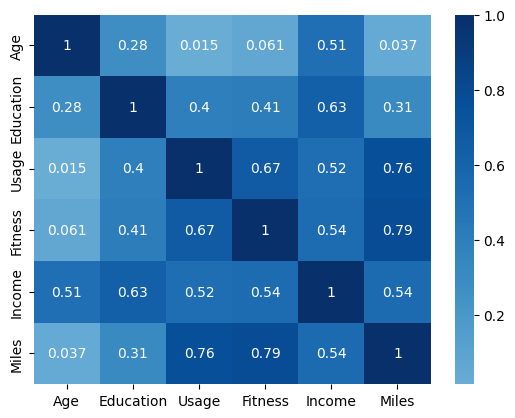

In [ ]:
#Checking correlation among different factors using heat maps
sns.heatmap(df.corr(), center=0, cmap='Blues',annot=True)

####<font color="orange">Observation</font>
The Heatmap is showing correlation between different pairs of variables. Here 1 represents highly positive correlation (If one variable increases, another also increases) , 0 represents independent variables which do not get affected by each other and -1 represents highly negative correlation (If one variable increases, another decreases).

Here we can analyse that
1. Education and Income have high positive correlation.
2. Usage and Fitness have high positive correlation (If usage of Treadmill for one is more then he will be more fit)
3. Usage and Miles have high positive correlation(The one whose usage is more must have covered more miles on the Treadmill)
4. Fitness and Miles have high positive correlation (The one who has covered more miles would be more fit).

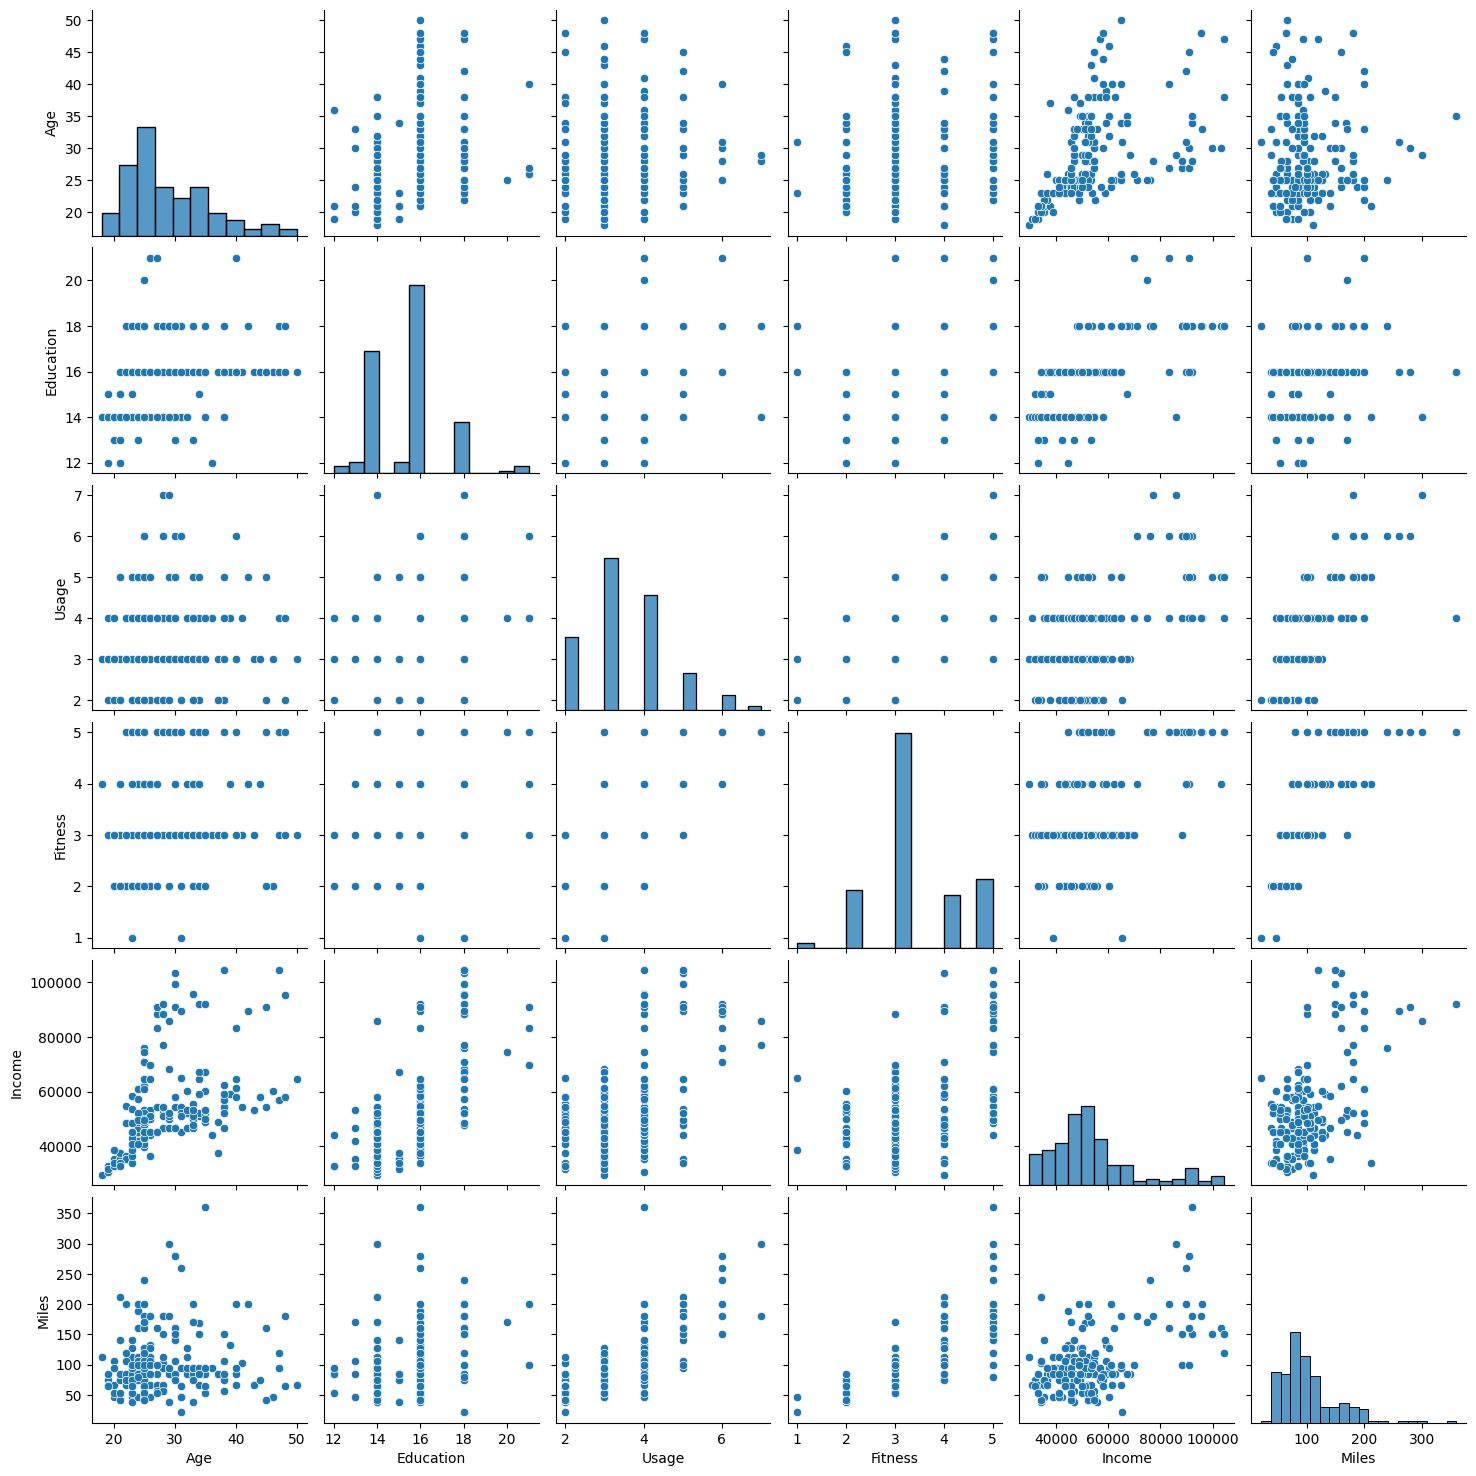

In [ ]:
#Checking correlation among different factors using pairplot
sns.pairplot(df)
plt.show()

##<font color="red">Conclusion </font>
1. Male Customers(57%) are more than Female customers(42%).
2. Partnered Customers (59%) are more than Single Customers (40%).
3. People on Fitness Level 3 tend to buy highest number of Treadmill.
4. People on Fitness level 1 tend to buy lowest number of Treadmill.
5. Most sold Treadmill is KP281.
6. Least sold Treadmill is KP781.
7. More salaried people are going for advance level treadmill,KP781 and less salaried people go for basic treadmill,KP281.
8. High Salaried people go for Advance level treadmill,KP781.
9. Average level income people go for Intermediate level or Basic level treadmill,KP481 and KP281.
10. Married People tend to go for KP781 more as compared to Single people.
11. Most of the users have Fitness rank 3 and least of the customers have rank 1.After rank 3 most people have rank 5, followed by rank 2 and rank 4.

#<font color="red">Customer Profiling </font>

###<font color="red">KP281 </font>

1. Average Age of Customers buying KP281 is 28.5.
2. KP281 Customers tend to use treadmill on an average 3 days a week.
3. Average Income of Customers of KP281 is 46,418.
4. Average Miles a Customer used to cover using KP281 is 83 every week.
5. It is popular among both Male and Female in equal ratio.
6. Income range of customers of KP281 for Single people is 40,000 to 46,000 and for Partnered people is 45,000 to 50,000.
7. Highest Fitness Level of KP281 users(Males and Females) is 5.
8. Conditional probability of a customer is Male given that he is buying KP281 is 50%.
9.  Conditional probability of a customer is Female given that he is buying KP281 is 50%.
10.Probability of purchasing KP281 given that the customer has Education of 12 Years=67%

   Probability of purchasing KP281 given that the customer has Education of 16 Years=46%

   Probability of purchasing KP281 given that the customer has Education of 16 Years=18%.

   Hence, People with less Years of Education prefer more going for KP281.
   
11. Probability of Buying KP281 given that the customer's Fitness Rank is 1=50%

    Probability of Buying KP281 given that the customer's Fitness Rank is 2=54%

    Probability of Buying KP281 given that the customer's Fitness Rank is 3=56%

    Probability of Buying KP281 given that the customer's Fitness Rank is 4=38%

    Probability of Buying KP281 given that the customer's Fitness Rank is 5=6.5%
    
    Hence, People with Fitness rank 3 more likely to Purchase KP281 and People with Fitness Rank 5 are very less likely to purchase KP281.

###<font color="red">KP481 </font>
1. Average Age of Customers buying KP281 is 29.

2. KP481 Customers tend to use treadmill on an average 3 days a week.

3. Average Income of Customers of KP481 is 48,973.

4. Average Miles a Customer used to cover using KP481 is 88 every week.

5. Highest Fitness Level of KP481 male users is 4 and female users is 5.
6. Probability of purchasing KP481 given that the customer is a Female=38%
   
   Probability of purchasing KP481 given that the customer is a Male=30%

   Hence, KP481 is more preferred by Females than Males.

7. Income range of customers of KP481 for Single people is 45,000 to 52,000 and for Partnered people is 46,000 to 52,000.
8. Probability of purchasing KP481 given that the customer has Education of 12 Years=33%

  Probability of purchasing KP481 given that the customer has Education of 16 Years=36%

9. Probability of Buying KP481 given that the customer's Fitness Rank is 1=50%

   Probability of Buying KP481 given that the customer's Fitness Rank is 2=46%

   Probability of Buying KP481 given that the customer's Fitness Rank is 3=40%

   Probability of Buying KP481 given that the customer's Fitness Rank is 4=33%

   Hence, People with less Fitness Rank are more likely to go for KP481 as compared to people on higher Fitness Rank.



###<font color="red">KP781 </font>
1. Average Age of Customers buying KP781 is 29.

2. KP781 Customers tend to use treadmill on an average 5 days a week.

3. Average Income of Customers of KP781 is 75,441.

4. Average Miles a Customer used to cover using KP781 is 167 every week.
5. People using KP781 are tend to be Fitness Freak.
6. More Males prefer KP781 than Females
7. Income range of customers of KP781 for Single people is 58,000 to 75,000 and for Partnered people is around 75,000 to 88,000
8. More High salaried people tend to go for KP781 as compared to Average salaried people.
9. Married people prefer buying KP781 more than Single people.
10. Probability of buying KP781 given that the customer is Partnered=21%
    
    Probability of buying KP781 given that the customer is Single=23%
11. Probability of Buying KP781 given that the customer's Fitness Rank is 1=0%

    Probability of Buying KP781 given that the customer's Fitness Rank is 3=41%

    Probability of Buying KP781 given that the customer's Fitness Rank is 4=29%

    Probability of Buying KP781 given that the customer's Fitness Rank is 5=94%

    Hence, People with Fitness Rank 5 are most likely to go for KP781.
12. Probability of purchasing KP781 given that the customer has Education of 12 Years=0%

    Probability of purchasing KP781 given that the customer has Education of 20 0r 21 Years=100%

    Probability of purchasing KP781 given that the customer has Education of 16 Years=18%

    Hence, More Educated People go for KP781 and are Fitness Concious.

#<font color="red">Recommendations </font>

1. KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K. These models should be promoted as budget treadmills. Marketing for these products should be focused on Average Income customers.
2. As KP781 provides more features and functionalities, the treadmill should be marketed for professionals, athletes and high Income level people.
3. We should endorse KP781 using recent winners of the Olympics or any sports event, for example, Neeraj Chopra or Sunil Chhetri5, for better outreach.
4. We should run a marketing campaign on Women's Day and Mother's day to encourage more women to exercise.
5. We should research how to expand our market for customers beyond 50 years of age. We can recommend basic treadmill models (KP281/KP481) for starters.
6. As usage increases over time, we can recommend customers to upgrade their existing models to high-end treadmill models resulting in more revenue.